# Clustering Model for analyze user preferences.

This analysis applies K-means clustering to a dataset of user color preferences. The goal is to group users into clusters based on their favorite colors and other related preferences. The process involves data preprocessing, clustering, and visualization to uncover meaningful patterns.

## Original Model Implementation
### Purpose
This notebook contains the full implementation of the clustering model. It includes:
- Data preprocessing
- Elbow method for optimal cluster determination
- K-means clustering with K=4
- Analysis of cluster preferences
- User input simulation and prediction
- Model saving 


In [1]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = "C:\\Users\\User\\Downloads\\Color_Preferences_Survey_Data_v4.csv"
color_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
color_data.head()


Favorite_Colors            Climate  \
0                        Green, White  Intermediate Zone   
1                        Green, Black  Intermediate Zone   
2  Green, Blue, Yellow, White, Orange           Dry Zone   
3                    Red, Green, Blue           Wet Zone   
4      Green, Blue, Pink, Grey, White           Dry Zone   

  Number_of_Family_Members                                          Lifestyle  \
0                     2-6'                                             Homies   
1                     2-6'                                       Party-lovers   
2                     2-6'  Homies (Prefer staying at home mostly, enjoyin...   
3                     2-6'    Job-runners (Busy with work, less time at home)   
4                     1-2'  Homies (Prefer staying at home mostly, enjoyin...   

  Natural_light_or_Rich_colors  Gender           Budget Architectural_Style  \
0                Natural light    Male      High Budget          Minimalist   
1                Natural light    Male  Moderate Budget          Minimalist   
2                Natural light  Female  Moderate Budget          Minimalist   
3                  Rich colors    Male       Low Budget         Traditional   
4                Natural light  Female  Moderate Budget              Modern   

  Photosensitivity                                         Color_Tone  \
0               No                       Neutral (Beige, White, Gray)   
1              Yes                         Cool Tones (Blues, Greens)   
2              Yes                       Neutral (Beige, White, Gray)   
3              Yes                       Neutral (Beige, White, Gray)   
4              Yes  Mixed/Balanced: A balanced combination of diff...   

          Preferred_Ambiance  
0            Bright and Airy  
1  Elegant and Sophisticated  
2            Bright and Airy  
3              Cozy and Warm  
4            Bright and Airy

## Data Preprocessing
### Step 1: Split Favorite Colors into Individual Features
Use `MultiLabelBinarizer` to transform multi-select color preferences into separate binary features.


In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Preprocessing
# Split the 'Favorite_Colors' into individual colors using MultiLabelBinarizer for one-hot encoding
color_data['Favorite_Colors'] = color_data['Favorite_Colors'].str.split(', ')
mlb = MultiLabelBinarizer()
favorite_colors_encoded = mlb.fit_transform(color_data['Favorite_Colors'])

# Convert to DataFrame and concatenate with original data
favorite_colors_df = pd.DataFrame(favorite_colors_encoded, columns=mlb.classes_)
processed_data = pd.concat([color_data.drop(columns=['Favorite_Colors']), favorite_colors_df], axis=1)

# Display the processed data
processed_data.head()


Climate Number_of_Family_Members  \
0  Intermediate Zone                     2-6'   
1  Intermediate Zone                     2-6'   
2           Dry Zone                     2-6'   
3           Wet Zone                     2-6'   
4           Dry Zone                     1-2'   

                                           Lifestyle  \
0                                             Homies   
1                                       Party-lovers   
2  Homies (Prefer staying at home mostly, enjoyin...   
3    Job-runners (Busy with work, less time at home)   
4  Homies (Prefer staying at home mostly, enjoyin...   

  Natural_light_or_Rich_colors  Gender           Budget Architectural_Style  \
0                Natural light    Male      High Budget          Minimalist   
1                Natural light    Male  Moderate Budget          Minimalist   
2                Natural light  Female  Moderate Budget          Minimalist   
3                  Rich colors    Male       Low Budget         Traditional   
4                Natural light  Female  Moderate Budget              Modern   

  Photosensitivity                                         Color_Tone  \
0               No                       Neutral (Beige, White, Gray)   
1              Yes                         Cool Tones (Blues, Greens)   
2              Yes                       Neutral (Beige, White, Gray)   
3              Yes                       Neutral (Beige, White, Gray)   
4              Yes  Mixed/Balanced: A balanced combination of diff...   

          Preferred_Ambiance  ...  Orange  Peach  Pink  Purple  Red  Silver  \
0            Bright and Airy  ...       0      0     0       0    0       0   
1  Elegant and Sophisticated  ...       0      0     0       0    0       0   
2            Bright and Airy  ...       1      0     0       0    0       0   
3              Cozy and Warm  ...       0      0     0       0    1       0   
4            Bright and Airy  ...       0      0     1       0    0       0   

   Teal  Turquoise  White  Yellow  
0     0          0      1       0  
1     0          0      0       0  
2     0          0      1       1  
3     0          0      0       0  
4     0          0      1       0  

[5 rows x 32 columns]

## Determining Optimal Number of Clusters (K)
### Step 2: Using the Elbow Method
Calculate the Within-Cluster Sum of Squares (WCSS) for a range of K values and plot the Elbow Method graph to find the optimal K.


C:\Users\User\anaconda3\envs\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


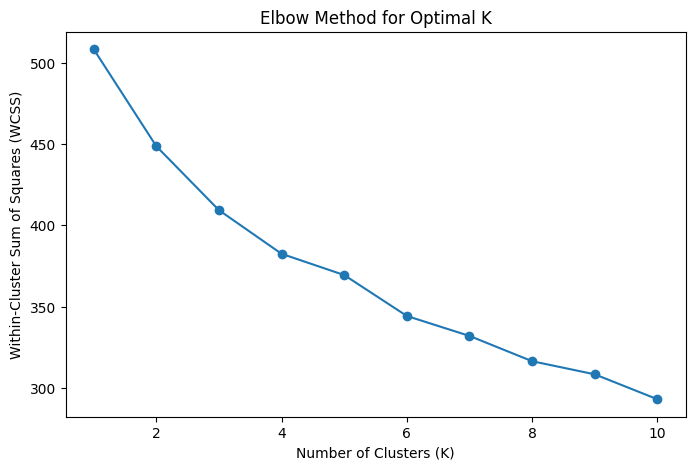

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecting the encoded color preferences for clustering
color_preferences = favorite_colors_df

# Step 2: Using the Elbow Method to find the optimal K value
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(color_preferences)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


## K-means Clustering
### Step 3: Applying K-means with Optimal K (4)
Cluster the dataset based on color preferences and add the cluster labels to the data.


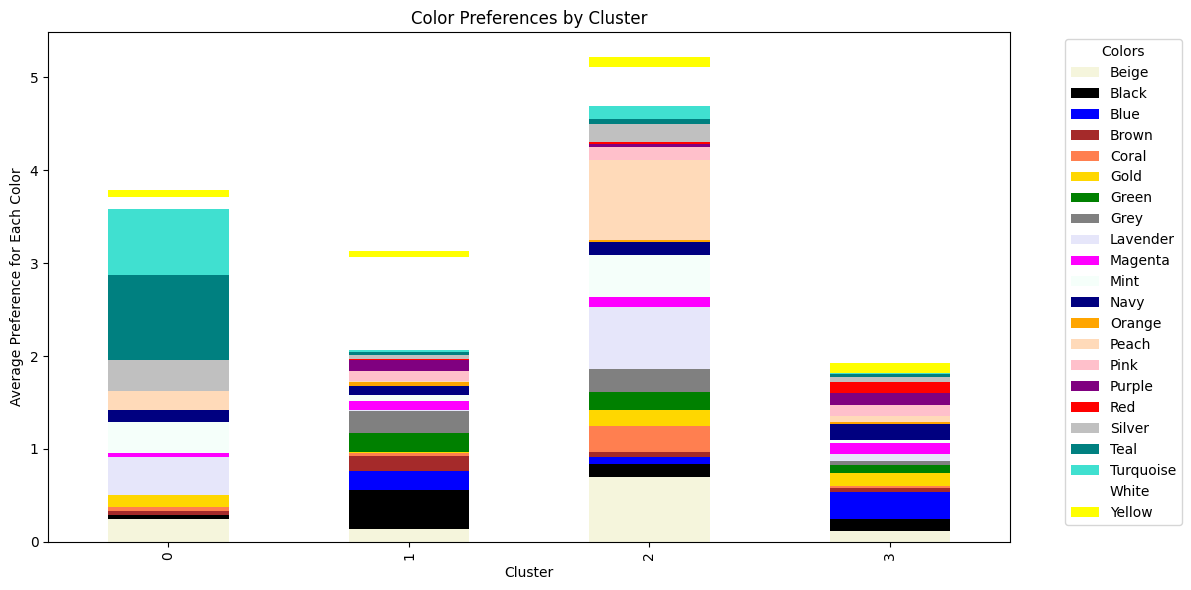

In [4]:
# Step 3: Applying K-means clustering with K=4
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `color_data` and `color_preferences` are preloaded DataFrames
kmeans = KMeans(n_clusters=4, random_state=42)
color_data['Cluster'] = kmeans.fit_predict(color_preferences)

# Step 4: Identifying predominant colors in each cluster
# Calculate the mean of each color feature for each cluster
mlb_classes = ['Beige', 'Black', 'Blue', 'Brown', 'Coral', 'Gold', 'Green', 'Grey', 
               'Lavender', 'Magenta', 'Mint', 'Navy', 'Orange', 'Peach', 'Pink', 
               'Purple', 'Red', 'Silver', 'Teal', 'Turquoise', 'White', 'Yellow']

cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=mlb_classes)
clustered_color_preferences = color_data[['Cluster']].join(color_preferences)

# Calculate mean preference for each color in each cluster
cluster_means = clustered_color_preferences.groupby('Cluster').mean()

# Define custom color palette to match the uploaded graph
custom_colors = [
    'beige', 'black', 'blue', 'brown', 'coral', 'gold', 'green', 'grey', 
    'lavender', 'magenta', 'mintcream', 'navy', 'orange', 'peachpuff', 'pink', 
    'purple', 'red', 'silver', 'teal', 'turquoise', 'white', 'yellow'
]

# Plot with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
cluster_means.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)
plt.xlabel("Cluster")
plt.ylabel("Average Preference for Each Color")
plt.title("Color Preferences by Cluster")
plt.legend(title="Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Step 4: User Prediction
#### Objective:
Predict the cluster for a new user's input preferences.
#### Actions:
Encode the user's input preferences.
Use the trained K-means model to predict the cluster.

In [7]:
# Define available options for each question
color_options = ['Red', 'Green', 'Blue', 'Yellow', 'Pink', 'Purple', 'Magenta', 'Grey', 'White', 'Black', 'Brown',
                 'Orange', 'Turquoise', 'Teal', 'Lavender', 'Navy', 'Beige', 'Coral', 'Mint', 'Peach', 'Gold', 'Silver']
tone_options = ['Neutral', 'Cool Tones', 'Warm Tones', 'Mixed/Balanced', 'No Specific Color Scheme']
climate_options = ['Dry', 'Wet', 'Intermediate']
ambiance_options = ['Cozy and Warm', 'Bright and Airy', 'Elegant and Sophisticated', 
                    'Modern and Minimalist', 'Vibrant and Energetic']
family_options = ['1 - 2', '2 - 6', 'Above 6']
lifestyle_options = ['Homies', 'Job-runners', 'Party-lovers']
light_options = ['Natural light', 'Rich colors']
gender_options = ['Male', 'Female', 'Prefer not to say']
style_options = ['Modern', 'Traditional', 'Minimalist']
budget_options = ['Low Budget', 'Moderate Budget', 'High Budget']
photosensitivity_options = ['Yes', 'No']

# Simulate user input for color preferences (replace this with actual user input in practice)
user_color_preferences = ['Peach', 'Green']  # Example user input for favorite colors
user_tone = 'Cool Tones'  # Example user input for color tone/theme
user_climate = 'Dry'  # Example user input for climate
user_ambiance = 'Bright and Airy'  # Example user input for preferred ambiance
user_family_size = '2 - 6'  # Example user input for family size
user_lifestyle = 'Homies'  # Example user input for lifestyle
user_light_preference = 'Natural light'  # Example user input for natural or rich colors
user_gender = 'Female'  # Example user input for gender
user_style = 'Modern'  # Example user input for architectural style
user_budget = 'Moderate Budget'  # Example user input for budget
user_photosensitivity = 'No'  # Example user input for photosensitivity

# Step 1: Encode user color preferences
user_colors_encoded = mlb.transform([user_color_preferences])[0]

# Step 3: Predict the cluster
user_cluster = kmeans.predict([user_colors_encoded])[0]

# Step 4: Output the cluster and display common colors in that cluster
print(f"Predicted Cluster for User: Cluster {user_cluster}")

# Display common colors in the predicted cluster
cluster_colors = cluster_means.loc[user_cluster]
print("\nAverage Color Preferences for Predicted Cluster:")
print(cluster_colors[cluster_colors > 0].sort_values(ascending=False))


Predicted Cluster for User: Cluster 3

Average Color Preferences for Predicted Cluster:
Blue         0.289474
Navy         0.171053
Purple       0.131579
Gold         0.131579
Black        0.131579
Beige        0.118421
Magenta      0.118421
Red          0.118421
Pink         0.118421
Yellow       0.105263
Green        0.092105
Lavender     0.078947
Peach        0.065789
Silver       0.052632
Grey         0.039474
Brown        0.039474
Orange       0.026316
Coral        0.026316
Teal         0.026316
Mint         0.026316
Turquoise    0.013158
Name: 3, dtype: float64


C:\Users\User\anaconda3\envs\deep_learning\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


### Step 5: Save model
Objective:
Save the trained K-means model and MultiLabelBinarizer for future use.

In [8]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_color_model_v11.pkl')

# Save the MultiLabelBinarizer
joblib.dump(mlb, 'mlb_encoder_v11.pkl')

['mlb_encoder_v11.pkl']

In [10]:
import joblib

# Calculate cluster means (average preferences for each cluster)
cluster_means = pd.DataFrame(kmeans.cluster_centers_, columns=mlb.classes_)

# Save the KMeans model, MultiLabelBinarizer, and cluster means
joblib.dump(kmeans, 'kmeans_color_model_v11.pkl')
joblib.dump(mlb, 'mlb_encoder_v11.pkl')
cluster_means.to_csv('cluster_means_v11.csv', index=False)  # Save cluster means as CSV
